# **Machine Learning Final Project**
## code and insights by Sidney Simner


---



# **Introduction**


## Column Definitions
- **track**: The Name of the track.

- **artist**: The Name of the Artist.

- **uri**: The resource identifier for the track.

- **danceability**: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable. 

- **energy**: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy. 

- **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C?/D?, 2 = D, and so on. If no key was detected, the value is -1.

- **loudness**: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db. 

- **mode**: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

- **speechiness**: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks. 

- **acousticness**: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic. The distribution of values for this feature look like this:

- **instrumentalness**: Predicts whether a track contains no vocals. “Ooh” and “aah” sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly “vocal”. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0. The distribution of values for this feature look like this:

- **liveness**: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.

- **valence**: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

- **tempo**: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration. 

- **duration_ms**:  The duration of the track in milliseconds.

- **time_signature**: An estimated overall time signature of a track. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure).

- **chorus_hit**: This the the author's best estimate of when the chorus would start for the track. Its the timestamp of the start of the third section of the track. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

- **sections**: The number of sections the particular track has. This feature was extracted from the data received by the API call for Audio Analysis of that particular track.

- **target**: The target variable for the track. It can be either '0' or '1'. '1' implies that this song has featured in the weekly list (Issued by Billboards) of Hot-100 tracks in that decade at least once and is therefore a 'hit'. '0' Implies that the track is a 'flop'.

- The author's condition of a track being 'flop' is as follows:

    - The track must not appear in the 'hit' list of that decade.
    - The track's artist must not appear in the 'hit' list of that decade.
    - The track must belong to a genre that could be considered non-mainstream and / or avant-garde. 
    - The track's genre must not have a song in the 'hit' list.
    - The track must have 'US' as one of its markets.

# Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.dummy import DummyClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import (
    classification_report,
    recall_score,
    precision_score,
    accuracy_score)

from sklearn.ensemble import RandomForestRegressor
import seaborn as sns 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from yellowbrick.regressor import ResidualsPlot
from sklearn.model_selection import cross_val_score

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# **Preprocessing**

In [2]:
data = pd.read_csv("dataset-of-70s.csv")

## Data Exploration

In [3]:
data.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
0,Porque?,Reginaldo Rossi,spotify:track:28KC2wl7jDv6Ms1Uc0OMpm,0.669,0.547,1,-9.873,0,0.0576,0.3530,0.000,0.0515,0.730,131.073,141067,4,28.79763,6,0
1,Free Jazz,Maria Teresa Luciani,spotify:track:0zagn8PNnM7pM8pz1gXOAD,0.291,0.300,1,-14.054,0,0.0326,0.9050,0.492,0.1180,0.039,75.619,228224,4,44.10303,9,0
2,Reject of Society,Crass,spotify:track:18eNASEiuAhO2ML5LBIoG4,0.355,0.968,7,-4.687,1,0.1890,0.0504,0.000,0.1300,0.768,181.291,66800,3,25.23004,6,0
3,Yeah !,The Jets,spotify:track:1UlJzHc8E5EprQFJxjSyPL,0.598,0.891,6,-11.904,1,0.0552,0.0183,0.836,0.5790,0.826,144.383,155395,4,55.62066,7,0
4,Gotta Find A Way,The Moments,spotify:track:1Jtlirju8tUXTtvyZJAN5v,0.440,0.376,5,-10.939,1,0.0482,0.3480,0.000,0.0815,0.358,130.438,218333,4,34.90979,12,1


From these columns, it is appearant that the first three columns will not be considered for regression as they are non numerical. This does present and unfortunate loss of data however to exclude the artist, as artist following may have a large impact on the success of a song. One improvement this dataset could make would be to have a cloumn rating the populattity of the artist. 

In [4]:
print(data.isnull().any())

track               False
artist              False
uri                 False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
duration_ms         False
time_signature      False
chorus_hit          False
sections            False
target              False
dtype: bool


the dataset includes no null values however one feature, key, gives a -1 value to any unkown keys. Let's count this to determine if there is too many unknown keys to make the column usefull. 

In [5]:
print(data.key[data.key == -1].count())

0


In [6]:
data.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
count,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7766.000000,7.766000e+03,7766.000000,7766.000000,7766.000000,7766.000000
mean,0.525500,0.527952,5.208344,-11.734270,0.721993,0.062053,0.434240,0.162163,0.199794,0.595993,119.009447,2.399331e+05,3.883981,39.847828,10.761010,0.500000
std,0.162817,0.235493,3.504480,4.815999,0.448046,0.069837,0.321500,0.306039,0.180526,0.266211,28.381402,1.449736e+05,0.431900,18.287632,5.642133,0.500032
min,0.063000,0.001100,0.000000,-41.440000,0.000000,0.022500,0.000001,0.000000,0.014600,0.000000,35.732000,2.049300e+04,1.000000,0.000000,0.000000,0.000000
25%,0.415000,0.354000,2.000000,-14.070000,0.000000,0.033500,0.124000,0.000004,0.092400,0.397000,98.348500,1.732200e+05,4.000000,27.742090,8.000000,0.000000
50%,0.534500,0.533000,5.000000,-11.046000,1.000000,0.041600,0.409000,0.000599,0.127000,0.638000,117.397500,2.108135e+05,4.000000,35.879100,10.000000,0.500000
75%,0.646000,0.712000,9.000000,-8.400000,1.000000,0.060475,0.726000,0.100000,0.243000,0.824000,135.085000,2.649732e+05,4.000000,47.213043,12.000000,1.000000
max,0.961000,0.999000,11.000000,3.744000,1.000000,0.952000,0.996000,0.998000,0.999000,0.990000,241.423000,3.391040e+06,5.000000,220.024500,130.000000,1.000000


In [7]:
data.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target
danceability,1.000000,0.215032,0.001114,0.208268,0.021193,0.071148,-0.186496,-0.267981,-0.132664,0.626128,-0.093498,-0.106790,0.142756,-0.018867,-0.102665,0.275601
energy,0.215032,1.000000,-0.002024,0.744654,-0.013560,0.084297,-0.637992,-0.237241,0.160789,0.520042,0.224997,-0.012401,0.167981,-0.013006,-0.043197,0.241756
key,0.001114,-0.002024,1.000000,-0.015602,-0.123617,0.025151,-0.005141,-0.002166,0.010337,-0.002272,-0.001445,0.021490,0.011633,-0.002609,0.017421,-0.021019
loudness,0.208268,0.744654,-0.015602,1.000000,0.027865,-0.023911,-0.442711,-0.379182,0.107402,0.389742,0.176158,-0.042914,0.117674,-0.016834,-0.055317,0.265339
mode,0.021193,-0.013560,-0.123617,0.027865,1.000000,-0.029051,0.025311,-0.092605,0.015799,0.032563,0.050250,-0.071467,-0.008974,-0.004539,-0.064851,0.093410
speechiness,0.071148,0.084297,0.025151,-0.023911,-0.029051,1.000000,0.032701,-0.075667,0.158637,0.007708,0.043396,0.006989,-0.055995,0.023744,-0.011392,-0.127620
acousticness,-0.186496,-0.637992,-0.005141,-0.442711,0.025311,0.032701,1.000000,0.208905,0.000052,-0.358903,-0.176512,-0.010866,-0.141512,0.012077,0.010631,-0.289887
instrumentalness,-0.267981,-0.237241,-0.002166,-0.379182,-0.092605,-0.075667,0.208905,1.000000,-0.073389,-0.283312,-0.074295,0.083468,-0.052849,0.024134,0.073975,-0.371937
liveness,-0.132664,0.160789,0.010337,0.107402,0.015799,0.158637,0.000052,-0.073389,1.000000,-0.019794,0.031529,0.034530,0.003353,0.036430,0.028659,-0.036014
valence,0.626128,0.520042,-0.002272,0.389742,0.032563,0.007708,-0.358903,-0.283312,-0.019794,1.000000,0.152634,-0.152342,0.149629,-0.049056,-0.139280,0.258680


In [8]:
print(len(data[data['target']==0]))
print(len(data[data['target']==1]))


3883
3883


**there are exactly the same number of Hits and Flops -- baseline accuracy = 50 %**

# **Modeling**

In [9]:
X = data.iloc[:,3:-1]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify = y, random_state = 42)

## Mulitple Linear Regression

Linear Regression Accuracy =  0.7021


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


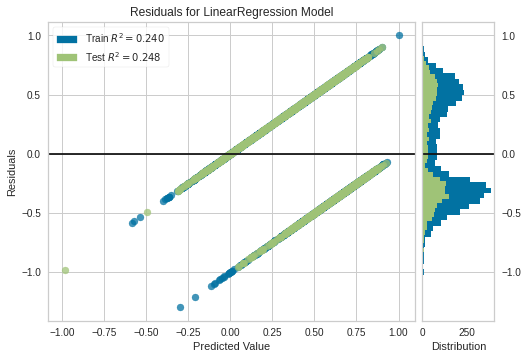

In [10]:
model_linear = linear_model.LinearRegression()
model_linear.fit(X_train, y_train)
pred_linear = model_linear.predict(X_test)

#predicition is between 0 and 1 -- round to the nearest integer to predict if the song is a hit 
rounded = np.round(pred_linear)

#compare for accuracy 
acc_linear = round(metrics.accuracy_score(y_test, rounded),4)
print('Linear Regression Accuracy = ', acc_linear)


#plot residuals
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(model_linear)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.poof()

## Decision Tree

Decision Tree Accuracy =  0.7378


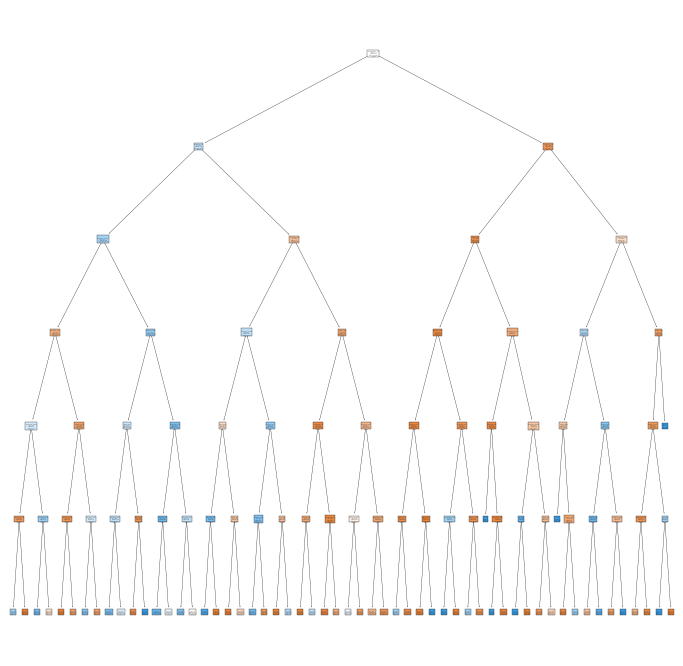

In [11]:
dt = DecisionTreeClassifier(max_depth = 6, max_features=15, random_state = 42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

#compare for accuracy 
acc_dt = round(metrics.accuracy_score(y_test, pred_dt),4)
print('Decision Tree Accuracy = ', acc_dt)

#print the tree
from sklearn import tree

fn = X.columns
classList = list(map(str,dt.classes_.tolist()))

plt.figure(figsize=(12,12))
tree.plot_tree(dt, feature_names=fn, class_names=classList, filled=True)
plt.show()

## Ada Boost

In [12]:
base_est = DecisionTreeClassifier(max_depth =6, max_features=15, random_state = 42)

ada_boost = AdaBoostClassifier(base_est, n_estimators=100)
ada_boost.fit(X_train, y_train)

acc_boost = accuracy_score(y_test, ada_boost.predict(X_test))
print('Ada Boost Accuracy = ', round(acc_boost,4))

Ada Boost Accuracy =  0.7296


## Bagging

In [13]:
base_est = DecisionTreeClassifier(max_depth =6, max_features=15, random_state = 42)

model_bagging = BaggingClassifier(base_estimator = base_est, n_estimators = 100)
model_bagging.fit(X_train, y_train)
pred_bagging = model_bagging.predict(X_test)

acc_bagging = round(metrics.accuracy_score(y_test, pred_bagging),4)
print('Bagging Accuracy = ', acc_bagging)

Bagging Accuracy =  0.7584


## Random Forest

In [14]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth =6, max_features=15, random_state = 42)
model_rf.fit(X_train, y_train)
pred_rf = model_rf.predict(X_test)

#compare for accuracy 
acc_forest = round(metrics.accuracy_score(y_test, pred_rf),4)
print('Random Forest Accuracy = ', acc_forest)


Random Forest Accuracy =  0.7588


## Most promising model

In [15]:
print('Linear Regression Accuracy = ', acc_linear)
print('Decision Tree Accuracy = ', acc_dt)
print('AdaBoost Accuracy = ', round(acc_boost,4))
print('Bagging Accuracy = ', acc_bagging)
print('Random Forest Accuracy = ', acc_forest)

bestModel = {'Bagging': acc_bagging, 'Random Forest': acc_forest, 'AdaBoost': round(acc_boost,4), 'Linear Regression': acc_linear, 'Decision Tree':acc_dt}
print("\nBest Model Accuracy:", max(bestModel, key = bestModel.get))

Linear Regression Accuracy =  0.7021
Decision Tree Accuracy =  0.7378
AdaBoost Accuracy =  0.7296
Bagging Accuracy =  0.7584
Random Forest Accuracy =  0.7588

Best Model Accuracy: Random Forest



Random Forest was the best classification method (of those explored) to use on this data as it had the highest accuracy score. It is the best fit because it has the most diversity of trees and accounts for the high variability in the data. This is a good model for the data due to the large number of features and the indepedence of each feature. 

# **Cross Validation**

In [3]:
# split the data three ways

X = data.iloc[:,3:-1]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.395, stratify = y, random_state = 42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, stratify = y_test, random_state = 42)

print(X.shape, y.shape)
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(7766, 15) (7766,)
(4698, 15) (4698,)
(1534, 15) (1534,)
(1534, 15) (1534,)


In [4]:
model_rf = RandomForestClassifier(n_estimators=100, max_depth =6, max_features=15, random_state = 42)
model_rf.fit(X_train, y_train)
pred_rf2 = model_rf.predict(X_val)

print("Cross Validation Score: ", cross_val_score(model_rf, X_val, y_val, cv=10, scoring='accuracy').mean())

acc_forest2 = round(metrics.accuracy_score(y_val, pred_rf2),4)
print('Random Forest Accuracy= ', acc_forest2)

Cross Validation Score:  0.7613784907902554
Random Forest Accuracy=  0.7764


In [5]:
# find the optimal depth and features

depth = []
features = []
for i in range(3,16):
    rf1 = RandomForestClassifier(n_estimators=100, max_depth=i)
    rf1 = rf1.fit(X_train,y_train)
    scores1 = cross_val_score(estimator=rf1, X=X_val, y=y_val, cv=10)
    depth.append((i,scores1.mean()))

    rf2 = RandomForestClassifier(n_estimators=100, max_features=i)
    rf2 = rf2.fit(X_train,y_train)
    scores2 = cross_val_score(estimator=rf2, X=X_val, y=y_val, cv=10)
    features.append((i,scores2.mean()))

print(depth)
print(features)

#best depth = 13
#best features = 9

[(3, 0.7437866055513114), (4, 0.7594516594516595), (5, 0.7653255241490535), (6, 0.7666242254477548), (7, 0.7705415499533146), (8, 0.7724980901451489), (9, 0.7705500381970969), (10, 0.7724896019013666), (11, 0.7672735760971054), (12, 0.7718020541549953), (13, 0.7750870044987692), (14, 0.7653043035395977), (15, 0.769870978694508)]
[(3, 0.7705415499533146), (4, 0.7705245734657499), (5, 0.7698964434258551), (6, 0.7764154146507087), (7, 0.7718402512520159), (8, 0.7744588744588744), (9, 0.7822892793481028), (10, 0.7718572277395805), (11, 0.7712163653340124), (12, 0.7712290976996858), (13, 0.7705670146846617), (14, 0.773818012053306), (15, 0.7679314149902384)]


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


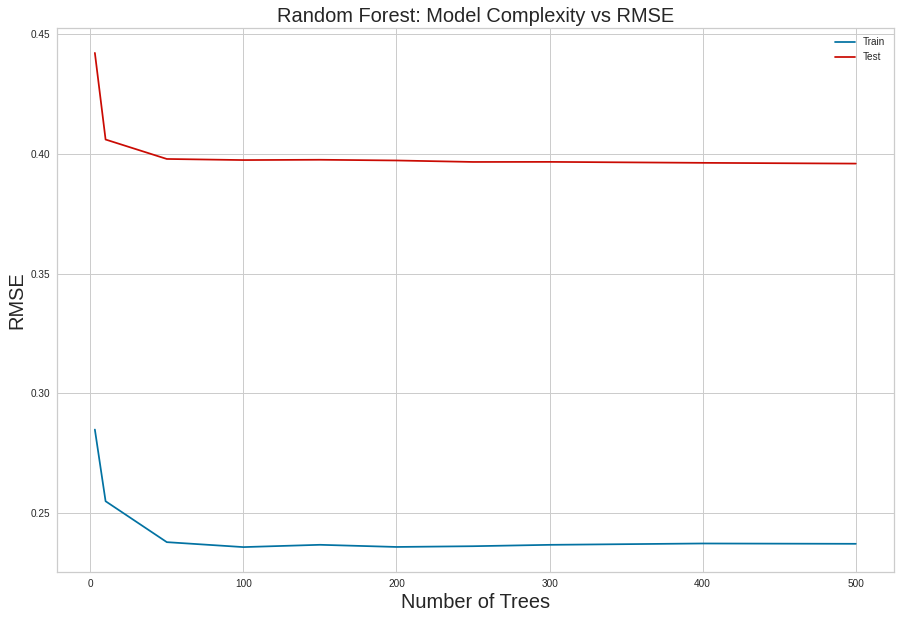

In [6]:
# find optimal n estimators

n_estimators = [3,10,50,100,150, 200, 250, 300, 400, 500]

train_error = []
test_error = []

for i in n_estimators:
    RF = RandomForestRegressor(n_estimators=i, max_depth =13, max_features=10, random_state = 42)
    RF.fit(X_train, y_train)
    train_error.append(np.sqrt(mean_squared_error(y_train, RF.predict(X_train))))
    test_error.append(np.sqrt(mean_squared_error(y_test, RF.predict(X_test))))

plt.figure(figsize = (15, 10))
plt.title('Random Forest: Model Complexity vs RMSE', fontsize=20)
plt.ylabel('RMSE', fontsize=20)
plt.xlabel('Number of Trees', fontsize=20)
sns.lineplot(n_estimators, train_error, label='Train')
sns.lineplot(n_estimators, test_error, color='r', label='Test')
plt.show()

In [7]:
model_rf_cv = RandomForestClassifier(n_estimators=500, max_depth =13, max_features=9, random_state = 42)
model_rf_cv.fit(X_train, y_train)
pred_rf_cv = model_rf_cv.predict(X_test)

print("Cross Validation Score after cross validation: ", cross_val_score(model_rf_cv, X_val, y_val, cv=10, scoring='accuracy').mean())

acc_forest_cv = round(metrics.accuracy_score(y_test, pred_rf_cv),4)
print('Random Forest Accuracy after cross validation= ', acc_forest_cv)

Cross Validation Score after cross validation:  0.7764069264069263
Random Forest Accuracy after cross validation=  0.766


# **Lasso Model**

In [26]:

alpha_space = np.logspace(-4, 0, 50)
model_scores = []

lasso_model = Lasso(normalize=True)
for alpha in alpha_space:

    # Specify the alpha value to use
    lasso_model.alpha = alpha
    
    # Perform 10-fold CV
    lasso_cv_scores = cross_val_score(lasso_model,X,y,cv=10)
    
    # Append the mean of lasso_cv_scores to model_scores = []
    model_scores.append(np.mean(lasso_cv_scores))

print(model_scores)

[0.2366879784387188, 0.23613493543804384, 0.2353147913872705, 0.23407464795674987, 0.2322393016836309, 0.22958243840072523, 0.2257040760213444, 0.22001735270515396, 0.2126808498831127, 0.20392389053730575, 0.19141561690327855, 0.1735350058698432, 0.1534207067718195, 0.12916961245794772, 0.09398991702953596, 0.057133361001300495, 0.021168905380864446, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.002629731983664607, -0.

In [27]:
# best alpha index for lasso 
print(np.argmax(model_scores))
#plus in this index to the list of alphas 

0


In [28]:
#best alpha to use 
print(alpha_space[0])
# this is th best alpha to use in the model

0.0001


In [29]:
from sklearn.linear_model import Lasso

#use the alpha previously found 
alpha_user = 0.0001
lasso_model = Lasso(alpha=alpha_user,normalize=True)
lasso_model.fit(X_train,y_train)
lasso_pred = lasso_model.predict(X_test)

#predicition is between 0 and 1 -- round to the nearest integer to predict if the song is a hit 
rounded_lasso = np.round(lasso_pred)

print("Lasso Model Accuracy:", metrics.accuracy_score(y_test, rounded_lasso))

print("\nLasso Model Coefficients:", lasso_model.coef_)

cols = list(X.columns.values)
lasso_importance = pd.DataFrame(lasso_model.coef_, index=cols).nlargest(3,[0])
print("\nLargest Lasso coefficients:\n", lasso_importance)

Lasso Model Accuracy: 0.7092568448500652

Lasso Model Coefficients: [ 4.63193207e-01  2.93370942e-02 -7.97097290e-04  2.30831159e-03
  4.13567221e-02 -9.22593900e-01 -2.29830952e-01 -4.54539885e-01
 -3.37812549e-02 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  5.09027658e-02 -2.68405380e-05 -3.69306384e-04]

Largest Lasso coefficients:
                        0
danceability    0.463193
time_signature  0.050903
mode            0.041357


The Lasso model score is similar to the linear regression model -- very low and not a good fit for the data. It's coefficients shows that the first feature, danceability, is the most important feature. This is not surprising as we are analyzing music from the 1970s

# **Performance**
Using a Random Forest Model

In [30]:
print(classification_report(y_test, pred_rf_cv))


              precision    recall  f1-score   support

           0       0.80      0.71      0.76       767
           1       0.74      0.83      0.78       767

    accuracy                           0.77      1534
   macro avg       0.77      0.77      0.77      1534
weighted avg       0.77      0.77      0.77      1534



# **Graphing and Other Insights**

In [32]:
#most important features 

feature_importances = model_rf_cv.feature_importances_
features = X_train.columns
df = pd.DataFrame({'features': features, 'importance': feature_importances}).nlargest(3, 'importance')
print(df)

            features  importance
7   instrumentalness    0.188803
6       acousticness    0.137006
11       duration_ms    0.111546


Text(0.5, 1.0, 'Variable Importances')

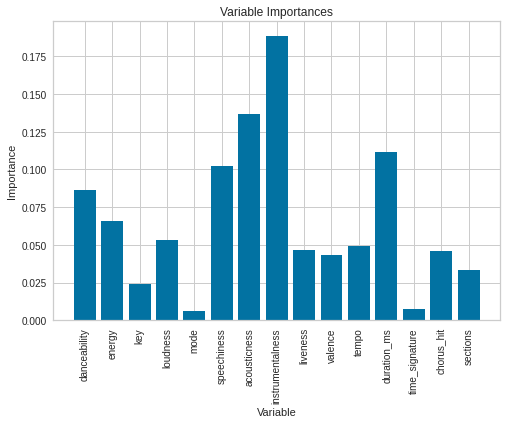

In [33]:
# list of x locations for plotting
x_values = list(range(len(feature_importances)))
# Make a bar chart
plt.bar(x_values, feature_importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, X.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance')
plt.xlabel('Variable')
plt.title('Variable Importances')

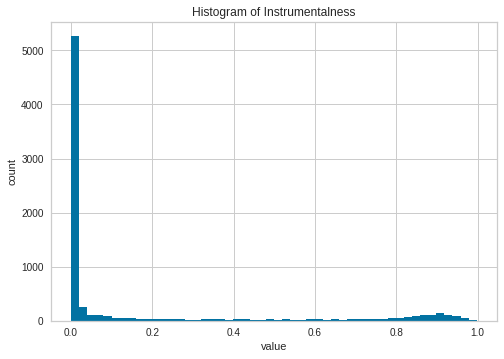

In [34]:
plt.hist(data.instrumentalness, bins = 50)
plt.xlabel('value')
plt.ylabel('count')
plt.title('Histogram of Instrumentalness')

plt.show()

Instrumentalness seems to be a highly skewed feature. Considering it is heavly considered in the Random Forest model, it might be wise to remove it and see if the accuracy improves. 

Danceability was the most important feature int the Lasso model and is more equally weighted.

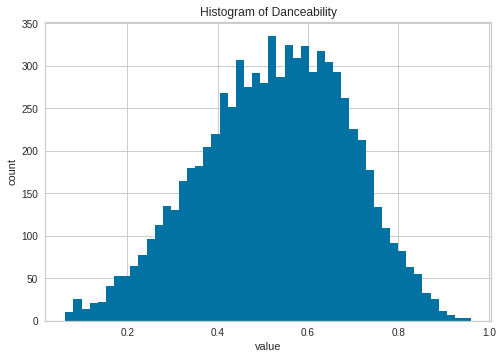

In [35]:
plt.hist(data.danceability, bins = 50)
plt.xlabel('value')
plt.ylabel('count')
plt.title('Histogram of Danceability')

plt.show()

### What makes the perfect song?

In [36]:
data[data.target == 1].mean()

danceability             0.570370
energy                   0.584880
key                      5.134690
loudness               -10.456478
mode                     0.763842
speechiness              0.053141
acousticness             0.341048
instrumentalness         0.048343
liveness                 0.193293
valence                  0.664852
tempo                  119.704382
duration_ms         233918.058460
time_signature           3.940252
chorus_hit              39.377945
sections                10.473088
target                   1.000000
dtype: float64

### What artist had the most hits?

In [37]:
hit_artists = data[data.target == 1].iloc[:,:2]
hit_artists = hit_artists.groupby('artist').count()
hit_artists = hit_artists.sort_values(by=['track'], ascending=False)

print(hit_artists.head())


              track
artist             
Neil Diamond     24
John Denver      24
Chicago          23
Elton John       23
Bee Gees         22
